In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

imoveis_df = pd.read_csv('../DBs/imoveis_df_aluguel.csv', 
                 thousands='.',   # '.' como separador de milhar
                 decimal=',')     # ',' como separador decimal



imoveis_df['price'] = imoveis_df['price'].astype(float)
imoveis_df['type'] = imoveis_df['type'].str.lower()
imoveis_df.head()

,description,type,price,size,bedrooms,car_spaces
0,"Csa 03, Taguatinga Sul (taguatinga) · Brasília",apartamento,2140.0,55 m²,2 quartos,0 vaga
1,"Cse 5, Taguatinga Sul (taguatinga) · Brasília",apartamento,1176.0,48 m²,2 quartos,1 vaga
2,"Qs 8 Conjunto 220, Areal (águas Claras) · Bras...",apartamento,1129.0,30 m²,1 quarto,0 vaga
3,Srpn Sqnw Clnw 1011 Bloco F - Brasília Df Bras...,studio,2961.0,36 m²,1 quarto,0 vaga
4,"Sqn 307, Asa Norte · Brasília",apartamento,10130.0,125 m²,3 quartos,1 vaga


In [2]:
imoveis_df['size'] = pd.to_numeric(imoveis_df['size'].str.replace(' m²', '', regex=False), errors='coerce')
imoveis_df['bedrooms'] = pd.to_numeric(imoveis_df['bedrooms'].str.extract('(\d+)')[0], errors='coerce')
imoveis_df['car_spaces'] = pd.to_numeric(imoveis_df['car_spaces'].str.extract('(\d+)')[0], errors='coerce')
imoveis_df['price_per_m2'] = imoveis_df['price'] / imoveis_df['size']

imoveis_df.dropna(subset=['type', 'price', 'size', 'bedrooms', 'car_spaces'], inplace=True)


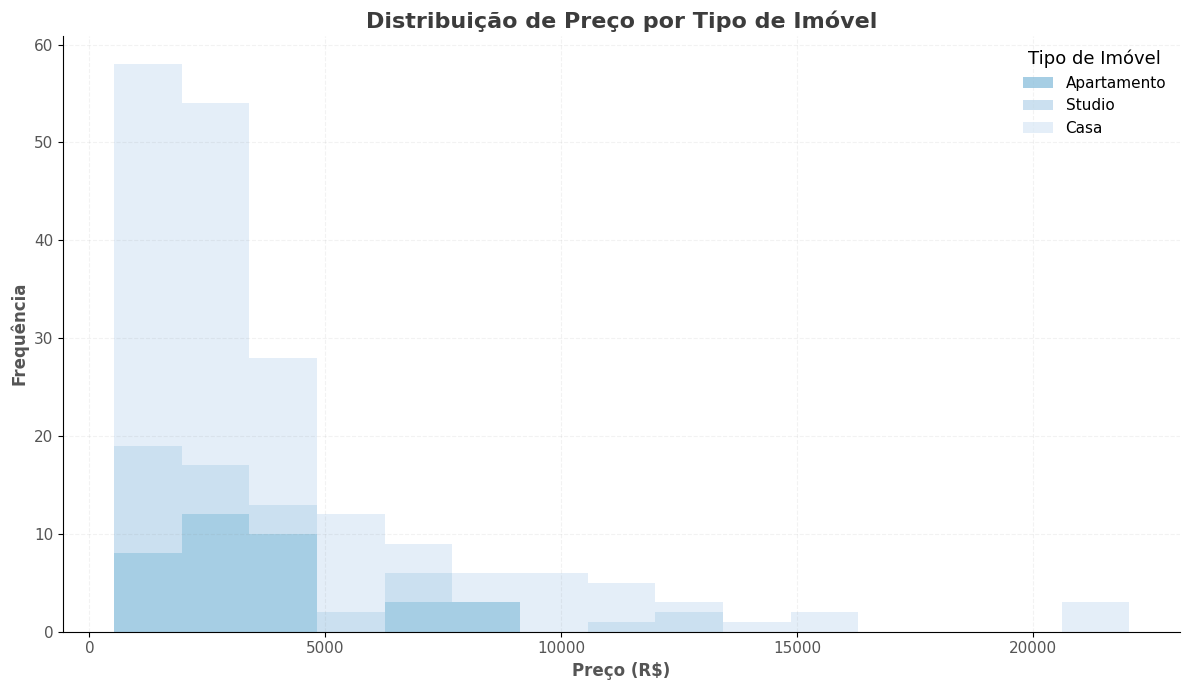

In [3]:
sns.set_palette("Blues", 6)

plt.figure(figsize=(12, 7))


ax = sns.histplot(data=imoveis_df, x='price', hue='type', kde=False, multiple='stack', bins=15, edgecolor='none')


plt.title('Distribuição de Preço por Tipo de Imóvel', fontsize=16, fontweight='bold', color='#3c3c3c')
plt.xlabel('Preço (R$)', fontsize=12, fontweight='bold', color='#555555')
plt.ylabel('Frequência', fontsize=12, fontweight='bold', color='#555555')


plt.xticks(fontsize=11, color='#555555')
plt.yticks(fontsize=11, color='#555555')


sns.despine()

new_labels = ['Apartamento', 'Studio', 'Casa']
ax.legend(labels=new_labels, title='Tipo de Imóvel', title_fontsize=13, fontsize=11, loc='upper right', frameon=False)
ax.grid(True, linestyle='--', color='gray', alpha=0.1)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


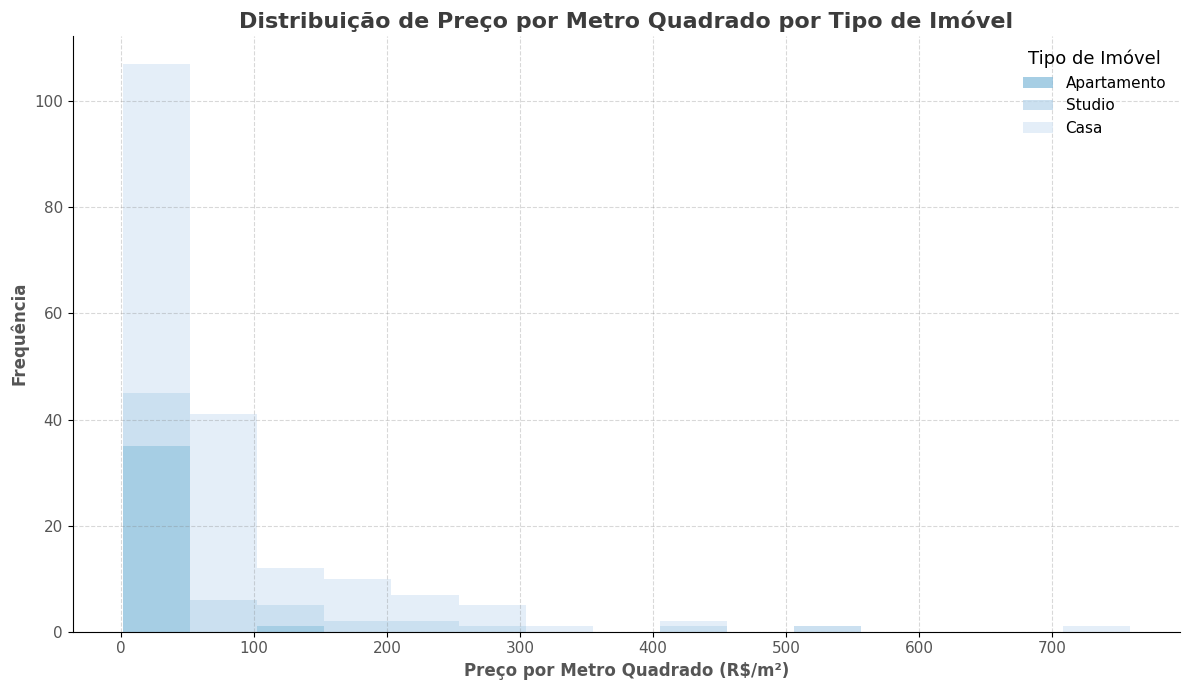

In [4]:
plt.figure(figsize=(12, 7))


ax = sns.histplot(data=imoveis_df, x='price_per_m2', hue='type', kde=False, multiple='stack', bins=15, edgecolor='none')

new_labels = ['Apartamento', 'Studio', 'Casa']
ax.legend(labels=new_labels, title='Tipo de Imóvel', title_fontsize=13, fontsize=11, loc='upper right', frameon=False)


plt.title('Distribuição de Preço por Metro Quadrado por Tipo de Imóvel', fontsize=16, fontweight='bold', color='#3c3c3c')
plt.xlabel('Preço por Metro Quadrado (R$/m²)', fontsize=12, fontweight='bold', color='#555555')
plt.ylabel('Frequência', fontsize=12, fontweight='bold', color='#555555')


plt.xticks(fontsize=11, color='#555555')
plt.yticks(fontsize=11, color='#555555')


ax.grid(True, linestyle='--', color='gray', alpha=0.3)


sns.despine()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

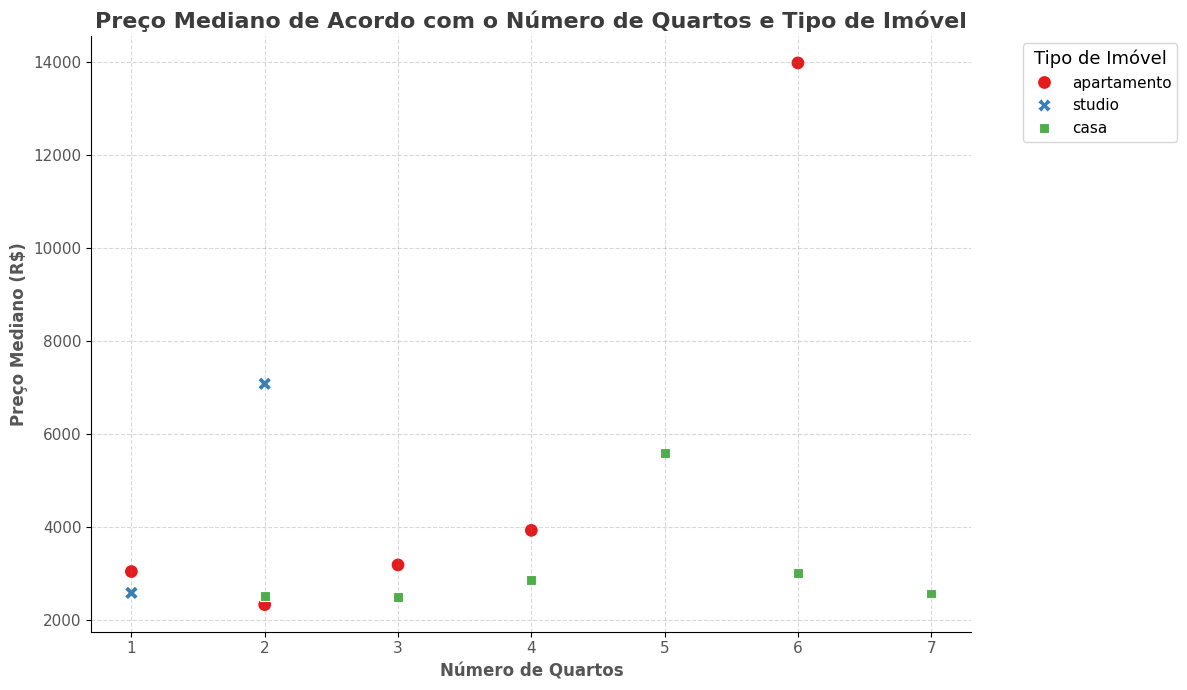

In [5]:
preco_medio_por_quarto_tipo = imoveis_df.groupby(['bedrooms', 'type'])['price'].median().reset_index()

plt.figure(figsize=(12, 7))

sns.scatterplot(data=preco_medio_por_quarto_tipo, x='bedrooms', y='price', hue='type', style='type', palette='Set1', s=100)

plt.title('Preço Mediano de Acordo com o Número de Quartos e Tipo de Imóvel', fontsize=16, fontweight='bold', color='#3c3c3c')
plt.xlabel('Número de Quartos', fontsize=12, fontweight='bold', color='#555555')
plt.ylabel('Preço Mediano (R$)', fontsize=12, fontweight='bold', color='#555555')

plt.xticks(fontsize=11, color='#555555')
plt.yticks(fontsize=11, color='#555555')

sns.despine()

plt.legend(title='Tipo de Imóvel', title_fontsize=13, fontsize=11, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.grid(True, linestyle='--', color='gray', alpha=0.3)
# Exibindo o gráfico
plt.tight_layout()
plt.show()